##**Unique Word Counter**

Drew Honson

Total Characters with Spaces: 44767
Total Characters without Spaces: 32907
Total Words: 7446
Total Unique Words: 1912


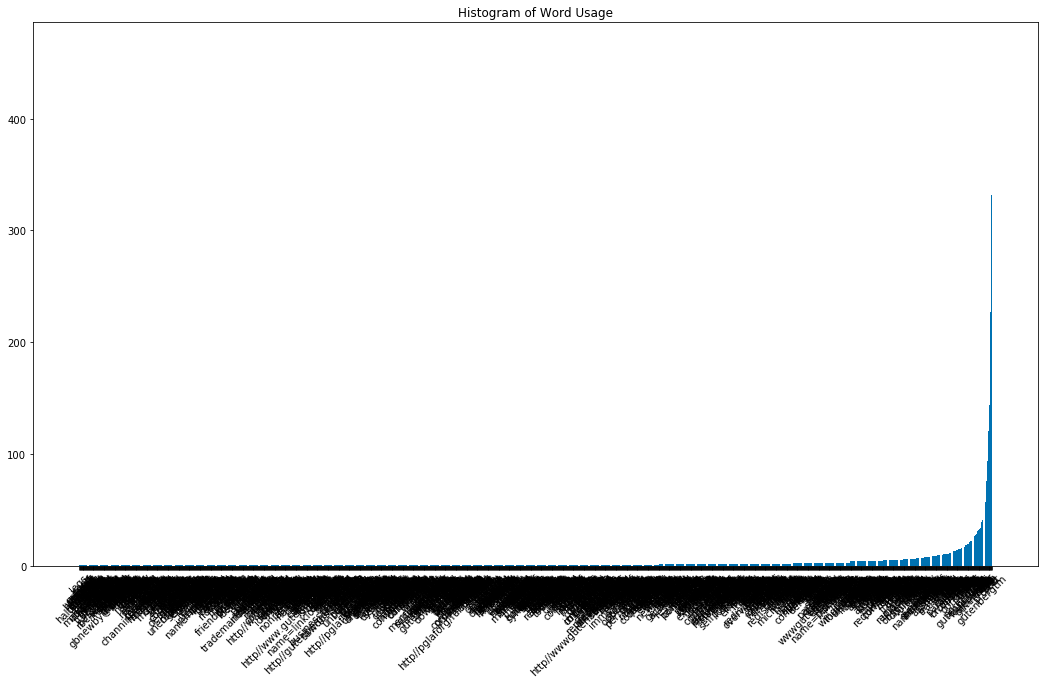

In [50]:
#Import packages
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")
plt.rcParams['figure.figsize'] = (18,10)
import csv
from lxml import html
import requests
from bs4 import BeautifulSoup

#Set up forbidden characters
forbidden = [".",":",";",",","!","?","1","2","3","4","5","6","7","8","9","0","-",'"','<','>',')','(']
forb2 = ['<','>','*','=','\\','#']

#Input text from html
page = requests.get("http://www.gutenberg.org/files/1459/1459-h/1459-h.htm")
tree = html.fromstring(page.content)
soup = BeautifulSoup(page.content, 'html.parser')
html = list(soup.children)[4]
body = list(html.children)[3]

#Convert bs4 into string and string into list 
sent = str(body)
senta = list(sent)

#Eliminate newline (\n) and forbidden characters
sentb = list(map(str.strip, senta))

for i in forbidden:
    for r in sentb:
        if i in r:
            sentb.remove(i)
            
#Newline eliminations also remove spaces. Replace spaces.
for index, i in enumerate(sentb):
    if i == '':
        sentb[index] = ' '

#Convert sentb to string and make lowercase. Convert back to list split at spaces
sentc = ''.join(sentb).lower()
sentd = sentc.split(' ')

#Eliminate anything that looks like code and any remaining space placeholders
for i in forb2:
    for r in sentd:
        if i in r:
            sentd.remove(r)
for i in sentd:
    if i == '':
        sentd.remove(i)
        
#Generate list of unique words        
sente = set(sentd)

#Total Characters with Spaces
print("Total Characters with Spaces: " + str(len(sent)))

#Total Characters without Spaces
print("Total Characters without Spaces: " + str(len(''.join(sentd))))
#Total Words
print("Total Words: " + str(len(sentd)))
#Total Unique Words
print("Total Unique Words: " + str(len(sente)))

#Word Statistics

#Count occurrences of unique words (sentence4) in total sentence (sentence3)
word_counts = []
for i in sente:
    if i in sentd:
        word_counts.append(sentd.count(i))

#Combine the two lists and turn it into a dictionary
sente_and_word_counts = zip(sente,word_counts)
wrdct = dict(sente_and_word_counts)

#Sort the words by word count
wrdst = sorted(wrdct, key=wrdct.__getitem__)
nosrt = sorted(wrdct.values())
srt_wrdct = zip(wrdst,nosrt)
wordsort = dict(srt_wrdct)

#Save the dictionary as a csv
with open('WordList2.csv', 'w') as f: 
    w = csv.DictWriter(f, wordsort.keys())
    w.writeheader()
    w.writerow(wordsort)
               
#Plot the dictionary on a bar graph (remove hashes to activate)
plt.bar(range(len(wordsort)), wordsort.values(), align='center')
plt.xticks(range(len(wordsort)), wordsort.keys(), rotation='45')
plt.title("Histogram of Word Usage")#plt.ylabel("Word Count")
plt.show()